# Fig S4 and S5 Plots

This notebook generates all plots for supporting Figs S4 and S5.

The data set for the reward-predictive model is located in `data/ExperimentTaskSequenceRewardChange*`. These data sets can be reproduced by running 

```
python -m main -e ExperimentTaskSequenceRewardChangeQLearning     # Q-learning baseline
python -m main -e ExperimentTaskSequenceRewardChangeQTransfer     # Q-learning with Q-value transfer
python -m main -e ExperimentTaskSequenceRewardChangeSFLearning    # SF-learning baseline
python -m main -e ExperimentTaskSequenceRewardChangeSFTransfer    # SF-learning with SF transfer
python -m main -e ExperimentTaskSequenceRewardChangeSFTransferAll # SF-learning with SF and reward transfer
```

The following cell will parse and load the data set into memory. This operation may take a few minutes.

In [1]:
import warnings; warnings.filterwarnings('ignore')

import numpy as np
import rewardpredictive as rp
import rlutils as rl
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font', **{'family': 'serif', 'size': 9})
rc('text', usetex=True)

es_qlearning = rp.ExperimentSetTaskSequenceRewardChangeQLearning.load()
es_qtransfer = rp.ExperimentSetTaskSequenceRewardChangeQTransfer.load()
es_sflearning = rp.ExperimentSetTaskSequenceRewardChangeSFLearning.load()
es_sftransfer = rp.ExperimentSetTaskSequenceRewardChangeSFTransfer.load()
es_sftransferall = rp.ExperimentSetTaskSequenceRewardChangeSFTransferAll.load()

Create directory to store all plot files in.

In [2]:
!mkdir -p figure/sftransfer

### Fig S4C

The print text lists the used hyper-parameter for the plot.

Q-learning
repeats: 20
task_sequence: significant
exploration: optimistic
episodes: 200
lr: 0.9
Q-learning with Q-value transfer
repeats: 20
task_sequence: significant
exploration: optimistic
episodes: 200
lr: 0.9
SF-learning
repeats: 20
task_sequence: significant
exploration: optimistic
episodes: 200
lr_sf: 0.3
lr_r: 0.9
SF-learning with SF and rew transfer
repeats: 20
task_sequence: significant
exploration: optimistic
episodes: 200
lr_sf: 0.3
lr_r: 0.9


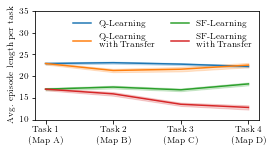

In [3]:
print('Q-learning')
exp_qlearning = es_qlearning.get_best_experiment(exploration='optimistic', task_sequence='significant') 
print('Q-learning with Q-value transfer')
exp_qtransfer = es_qtransfer.get_best_experiment(exploration='optimistic', task_sequence='significant')  
print('SF-learning')
exp_sflearning = es_sflearning.get_best_experiment(exploration='optimistic', task_sequence='significant')  
print('SF-learning with SF and rew transfer')
exp_sftransferall = es_sftransferall.get_best_experiment(exploration='optimistic', task_sequence='significant')  

ep_len_qlearning = np.mean(exp_qlearning.results['episode_length'], axis=-1)
ep_len_qtransfer = np.mean(exp_qtransfer.results['episode_length'], axis=-1)
ep_len_sflearning = np.mean(exp_sflearning.results['episode_length'], axis=-1)
ep_len_sftransfer = np.mean(exp_sftransferall.results['episode_length'], axis=-1)

plt.figure(figsize=(4, 2))
rl.plot.mean_with_sem([1, 2, 3, 4], ep_len_qlearning, axis=0, color='C0', label='Q-Learning')
rl.plot.mean_with_sem([1, 2, 3, 4], ep_len_qtransfer, axis=0, color='C1', label='Q-Learning\nwith Transfer')
rl.plot.mean_with_sem([1, 2, 3, 4], ep_len_sflearning, axis=0, color='C2', label='SF-Learning')
rl.plot.mean_with_sem([1, 2, 3, 4], ep_len_sftransfer, axis=0, color='C3', label='SF-Learning\nwith Transfer')
plt.ylim([10, 35])
plt.ylabel('Avg. episode length per task')
plt.xticks([1, 2, 3, 4], ['Task 1\n(Map A)', 'Task 2\n(Map B)', 'Task 3\n(Map C)', 'Task 4\n(Map D)'])
leg = plt.legend(loc=1, ncol=2, frameon=False)
leg.get_frame().set_linewidth(0.0)
plt.savefig('figure/sftransfer/comparison_ep_len_per_task.pdf', bbox_inches='tight', pad_inches=.1, transparent=True)

### Fig S4B

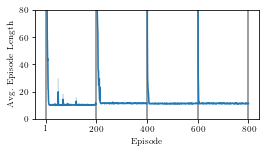

In [4]:
plt.figure(figsize=(4, 2))
for i in [1, 200, 400, 600, 800]:
    plt.plot([i, i], [0, 1000], c='k', alpha=0.5)
ep_len_list = np.array(exp_sftransferall.results['episode_length']).transpose([1, 0, 2])
ep_idx = np.arange(200) + 1
for i, ep_len in enumerate(ep_len_list):
    rl.plot.mean_with_sem(ep_idx + i * 200, ep_len, axis=0, color='C0')
_ = plt.xticks([1] + list(np.arange(200, 801, 200)))
plt.xlabel('Episode')
plt.ylabel('Avg. Episode Length')
plt.ylim([0, 80])
plt.savefig('figure/sftransfer/sf_transfer_ep_len.pdf', bbox_inches='tight', pad_inches=.1, transparent=True)

In [5]:
def plot_episode_length_comparison(experiment_list, label_list):
    get_episode_len = lambda e: np.mean(np.mean(np.stack(e.results['episode_length'])[:, 1:, :], axis=-1), axis=-1)
    ep_len_list = [get_episode_len(e) for e in experiment_list]
    plt.boxplot(ep_len_list, positions=range(len(label_list)))
    plt.xticks(range(len(label_list)), label_list, rotation=90)
    plt.ylabel('Avg. episode length\nafter first task')

### Fig S5A

The print text lists the used hyper-parameter for the plot.

Q-learning
repeats: 20
task_sequence: significant
exploration: optimistic
episodes: 200
lr: 0.9
Q-learning with Q-value transfer
repeats: 20
task_sequence: significant
exploration: optimistic
episodes: 200
lr: 0.9
SF-learning
repeats: 20
task_sequence: significant
exploration: optimistic
episodes: 200
lr_sf: 0.3
lr_r: 0.9
SF-learning with SF transfer
repeats: 20
task_sequence: significant
exploration: optimistic
episodes: 200
lr_sf: 0.3
lr_r: 0.9
SF-learning with SF and reward transfer
repeats: 20
task_sequence: significant
exploration: optimistic
episodes: 200
lr_sf: 0.3
lr_r: 0.9


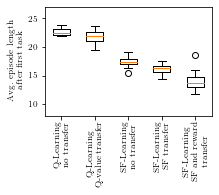

In [6]:
print('Q-learning')
exp_qlearning = es_qlearning.get_best_experiment(exploration='optimistic', task_sequence='significant') 
print('Q-learning with Q-value transfer')
exp_qtransfer = es_qtransfer.get_best_experiment(exploration='optimistic', task_sequence='significant')  
print('SF-learning')
exp_sflearning = es_sflearning.get_best_experiment(exploration='optimistic', task_sequence='significant')  
print('SF-learning with SF transfer')
exp_sftransfer = es_sftransfer.get_best_experiment(exploration='optimistic', task_sequence='significant')  
print('SF-learning with SF and reward transfer')
exp_sftransferall = es_sftransferall.get_best_experiment(exploration='optimistic', task_sequence='significant') 

plt.figure(figsize=(3, 2))
plot_episode_length_comparison(
    experiment_list=[
        exp_qlearning,
        exp_qtransfer,
        exp_sflearning,
        exp_sftransfer,
        exp_sftransferall
    ], 
    label_list=[
        'Q-Learning\nno transfer',
        'Q-Learning\nQ-value transfer',
        'SF-Learning\nno transfer',
        'SF-Learning\nSF transfer',
        'SF-Learning\nSF and reward\ntransfer'
    ]
)
plt.ylim([8, 27])
plt.savefig('figure/sftransfer/comparison_ep_len_optimistic.pdf', bbox_inches='tight', pad_inches=.1, transparent=True)

### Fig S5B

Q-learning
repeats: 20
task_sequence: significant
exploration: egreedy
episodes: 200
lr: 0.7
Q-learning with Q-value transfer
repeats: 20
task_sequence: significant
exploration: egreedy
episodes: 200
lr: 0.9
SF-learning
repeats: 20
task_sequence: significant
exploration: egreedy
episodes: 200
lr_sf: 0.1
lr_r: 0.5
SF-learning with SF transfer
repeats: 20
task_sequence: significant
exploration: egreedy
episodes: 200
lr_sf: 0.3
lr_r: 0.3
SF-learning with SF and reward transfer
repeats: 20
task_sequence: significant
exploration: egreedy
episodes: 200
lr_sf: 0.1
lr_r: 0.7


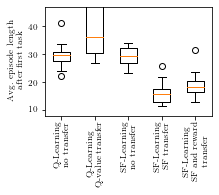

In [7]:
print('Q-learning')
exp_qlearning = es_qlearning.get_best_experiment(exploration='egreedy', task_sequence='significant') 
print('Q-learning with Q-value transfer')
exp_qtransfer = es_qtransfer.get_best_experiment(exploration='egreedy', task_sequence='significant')  
print('SF-learning')
exp_sflearning = es_sflearning.get_best_experiment(exploration='egreedy', task_sequence='significant')  
print('SF-learning with SF transfer')
exp_sftransfer = es_sftransfer.get_best_experiment(exploration='egreedy', task_sequence='significant')  
print('SF-learning with SF and reward transfer')
exp_sftransferall = es_sftransferall.get_best_experiment(exploration='egreedy', task_sequence='significant') 

plt.figure(figsize=(3, 2))
plot_episode_length_comparison(
    experiment_list=[
        exp_qlearning,
        exp_qtransfer,
        exp_sflearning,
        exp_sftransfer,
        exp_sftransferall
    ], 
    label_list=[
        'Q-Learning\nno transfer',
        'Q-Learning\nQ-value transfer',
        'SF-Learning\nno transfer',
        'SF-Learning\nSF transfer',
        'SF-Learning\nSF and reward\ntransfer'
    ]
)
plt.ylim([8, 47])
plt.savefig('figure/sftransfer/comparison_ep_len_egreedy.pdf', bbox_inches='tight', pad_inches=.1, transparent=True)